In [1]:
import pandas as pd
import numpy as np
text='/Users/matiasinostrozacifuentes/Desktop/Desktop/python_intro/DataScience_Unilever/Semana_6/Data/titanic.csv'
data=pd.read_csv(text)

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"Age": np.float64, "Fare": np.float64})

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

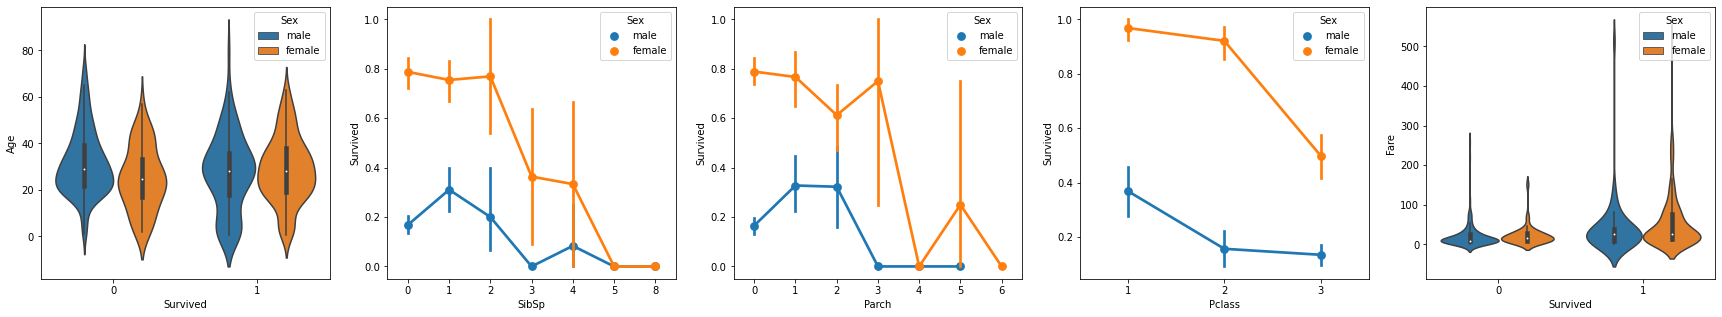

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="Survived", y="Age", hue="Sex", data=data, ax=axs[0])
sns.pointplot(x="SibSp", y="Survived", hue="Sex", data=data, ax=axs[1])
sns.pointplot(x="Parch", y="Survived", hue="Sex", data=data, ax=axs[2])
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data, ax=axs[3])
sns.violinplot(x="Survived", y="Fare", hue="Sex", data=data, ax=axs[4])

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [6]:
data.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


In [7]:
data['relatives'] = data.apply (lambda row: int((row['SibSp'] + row['Parch']) > 0), axis=1)
data.corr().abs()[["Survived"]]

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Sex,0.543351
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307
relatives,0.203367


In [8]:
data = data[['Sex', 'Pclass','Age','relatives','Fare','Survived']].dropna()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Sex','Pclass','Age','relatives','Fare']], data.Survived, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7482517482517482
